# Classification model using Random Forest

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


### 2. Upload Clinic data

In [2]:
path ="../../../../Data_preprocessing\RNA post_autoencoder+Clinic joined\Clinical_data_and_RNA_30_Features_PFS.csv"
data = pd.read_csv(path)
data.head()

,Unnamed: 0,RNA_ID,Age,Sarc,Rhab,Number_of_Prior_Therapies,Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy,Tumor_Shrinkage,PFS,TM_TC_Ratio,...,RP11-96O20.4,RP5-827C21.1,RPS12P26,SDR42E1,SNORD113-5,TARBP2,TRAV41,TRIM43B,VN2R17P,XPC
0,0,G138701_RCCBMS-00097-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,5.490411,1.374775,...,0.682591,0.640214,0.842022,1.000000,0.625993,0.912529,0.971557,0.587310,0.863040,0.974497
1,1,G138701_RCCBMS-00099-T_v1_RNA_OnPrem,62.0,0.0,0.0,3.0,707.0,0.0,1.249315,1.374775,...,0.682591,0.713747,0.726861,0.694015,0.625993,0.903036,0.666040,0.587310,0.863040,0.958581
2,2,G138701_RCCBMS-00163-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,5.654795,1.374775,...,0.682591,0.763067,0.747376,0.869025,0.625993,0.898032,0.888588,0.587310,0.863040,0.980335
3,3,G138701_RCCBMS-00116-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,1.216438,1.374775,...,0.669220,0.481977,0.797865,0.931136,0.624581,0.873870,0.826337,0.564337,0.855268,0.945490
4,4,G138701_RCCBMS-00136-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,2.860274,1.374775,...,0.677685,0.745493,0.772651,0.902087,0.613038,0.896762,0.767579,0.552830,0.857563,0.948794


In [3]:
Y = [] # Target column
# For each entry I classified it by its PFS value.
for i in range (len(data)):
    if data.PFS[i]<3: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    elif data.PFS[i]<6: # If PFS is over 6 months, I will consider it as Responder (R)
        Y.append(1)
    else:
        Y.append(2) # If PFS is between 3 and 6 months, I will consider it as SemiResponder (SR)
        

data = data.drop('PFS', axis=1)
data = data.drop('RNA_ID', axis=1)

print(data.head())
X = data.iloc[:,1:57] 
# I selected all the columns by removing the Unnamed column (row id) and the Target column.
print(X)
print('Numero de pacientes: ',len(Y))

   Unnamed: 0   Age  Sarc  Rhab  Number_of_Prior_Therapies  \
0           0  62.0   0.0   0.0                        2.0   
1           1  62.0   0.0   0.0                        3.0   
2           2  62.0   0.0   0.0                        2.0   
3           3  62.0   0.0   0.0                        2.0   
4           4  62.0   0.0   0.0                        2.0   

   Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy  \
0                                              707.0             
1                                              707.0             
2                                              707.0             
3                                              707.0             
4                                              707.0             

   Tumor_Shrinkage  TM_TC_Ratio  Cohort_CM-009  Cohort_CM-010  ...  \
0              0.0     1.374775              0              1  ...   
1              0.0     1.374775              0              1  ...   
2              0.0  

### 3. Train-Test dataset split

In [4]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125)

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 115
Target column size of the training set: 115
Test set size: 29
Target column size of the test set: 29


In [5]:
param_grid = {'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 3, 4, 5],
              'random_state':[125],
              'n_estimators': [10, 20],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy'],
              'max_depth':[None, 2, 5, 10,50]
              }

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(
        estimator  = RandomForestClassifier(),
        param_grid = param_grid,
        cv=5
       )

clf.fit(XTrain , yTrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 5, 10, 50],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 20], 'random_state': [125]})

In [6]:
print("Best estimate of parameters according to GridSearchCV:")
model = clf.best_estimator_
# Fit the model with the best parameters
model.fit(XTrain , yTrain)

Best estimate of parameters according to GridSearchCV:


RandomForestClassifier(max_depth=2, min_samples_leaf=2, n_estimators=10,
                       random_state=125)

In [7]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))

Best result of the cross validation of the model with the best paramters:0.5826086956521739


### 5. Prediction

In [8]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [9]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1


### 6. Results

In [10]:
print('Final accuracy on the training dataset:' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(yTest)))

Final accuracy on the training dataset:0.6
Final accuracy on the testing dataset: 0.6896551724137931


In [11]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[66  0  0]
 [25  2  0]
 [21  0  1]]
Input data:  [0 0 2 2 0 1 0 1 1 1 0 1 0 0 0 0 2 0 0 1 0 0 0 0 0 2 2 2 0 0 0 2 1 0 0 0 2
 1 0 0 0 0 2 1 1 0 1 0 1 0 0 2 1 2 0 0 0 0 1 0 2 2 1 0 0 0 0 2 0 2 2 0 0 0
 0 2 1 0 0 1 1 0 2 0 0 0 0 2 1 1 0 0 2 1 0 2 0 1 1 0 2 0 0 0 1 0 1 0 0 0 1
 0 1 0 0]
Prediction:        [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


In [12]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       0.59      1.00      0.74        66
           1       1.00      0.07      0.14        27
           2       1.00      0.05      0.09        22

    accuracy                           0.60       115
   macro avg       0.86      0.37      0.32       115
weighted avg       0.76      0.60      0.47       115



In [13]:
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix(yTest,yhatTest))
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[19  0  0]
 [ 3  1  0]
 [ 6  0  0]]
Input data:  [2 0 2 0 0 2 2 0 2 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 2 0 0 1 0]
Prediction:        [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [14]:
print(classification_report(yTest,yhatTest))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        19
           1       1.00      0.25      0.40         4
           2       0.00      0.00      0.00         6

    accuracy                           0.69        29
   macro avg       0.56      0.42      0.40        29
weighted avg       0.58      0.69      0.58        29



C:\Users\sandr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sandr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sandr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


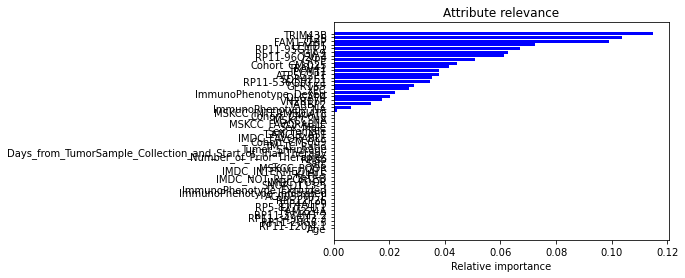

Age = 0.0
Sarc = 0.0
Rhab = 0.0
Number_of_Prior_Therapies = 0.0
Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy = 0.0
Tumor_Shrinkage = 0.0
TM_TC_Ratio = 0.0
Cohort_CM-009 = 0.0
Cohort_CM-010 = 0.0
Cohort_CM-025 = 0.044371766691822336
Sex_Female = 0.0
Sex_Male = 0.0
MSKCC_FAVORABLE = 0.0
MSKCC_INTERMEDIATE = 0.0011016622556793475
MSKCC_NA = 0.0
MSKCC_POOR = 0.0
IMDC_FAVORABLE = 0.0
IMDC_INTERMEDIATE = 0.0
IMDC_NOT_REPORTED = 0.0
IMDC_POOR = 0.0
ImmunoPhenotype_Desert = 0.02215312368248258
ImmunoPhenotype_Excluded = 0.0
ImmunoPhenotype_Infiltrated = 0.0
ImmunoPhenotype_NA = 0.0060999815928334785
AC005307.1 = 0.0
ATP5G2P1 = 0.03784505430522851
DLGAP4 = 0.020275599684498664
EIF4A1P9 = 0.0
FAM172BP = 0.09889833774432065
FAM224A = 0.0
GJA9 = 0.06276198145710224
GPR155 = 0.02895612665751694
GYPE = 0.0507682736579844
IL25 = 0.1038923531875207
KLHL5 = 0.0
LANCL1-AS1 = 0.0
LEMD1 = 0.07249441254158503
PCMT1 = 0.03803637343789669
RP11-120J4.1 = 0.0
RP11-20G6.3 = 0.0
RP11-349G13.2 = 0.

In [15]:
# Through the created model we can see which attributes are the most significant to make a decision.
# The most relevant attributes will be the ones placed at the top of the tree.
features = list(X)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Attribute relevance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()

for name, importance in zip(X, model.feature_importances_):
    print(name, "=", importance)

# Attributes whose relevance is 0, will not be necessary to make the prediction of the target.